# Coder__ Hussam Qassim__

# Setup

In [1]:
'''
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, 
ensure MatplotLib plots figures inline and prepare a function to save the figures
'''

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "median_house_values_in_californian_districts"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
print('Done..')

Done..


# Fetch the Data

In [2]:
'''
fetch_housing_data() , it creates a datasets/housing directory in your workspace,
downloads the housing.tgz file, and extracts the housing.csv from it in this directory
'''
# Import the necessary libraries
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# Create a function to fetch the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if	not	os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# fetch the data
fetch_housing_data()
print('Done..')

Done..


### Load the Data 

In [3]:
# Import the necessary libraries
import pandas as pd

# Create a function to load the housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Load the housing data 
housing = load_housing_data()

# Show the top five rows, each row represents one distric. There are 10 attributes
print('Top 5 rows:\n', '{}{}'.format(housing.head(),'\n'))

# Print a quick description of the data
print('{}{}'.format(housing.info(), '\n'))

# Find Out what categories exist in (ocean_proximity) attribute and how many districts belong to each category
print('ocean_proximity categories description:\n', '{}{}'.format(housing["ocean_proximity"].value_counts(),
                                                                 '\n'))

# Shows a summary of the numerical attributes
print('Summary of the numerical attribute:\n', '{}'.format(housing.describe()))

Top 5 rows:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entri

### Ploting

Saving figure attribute_histogram_plots


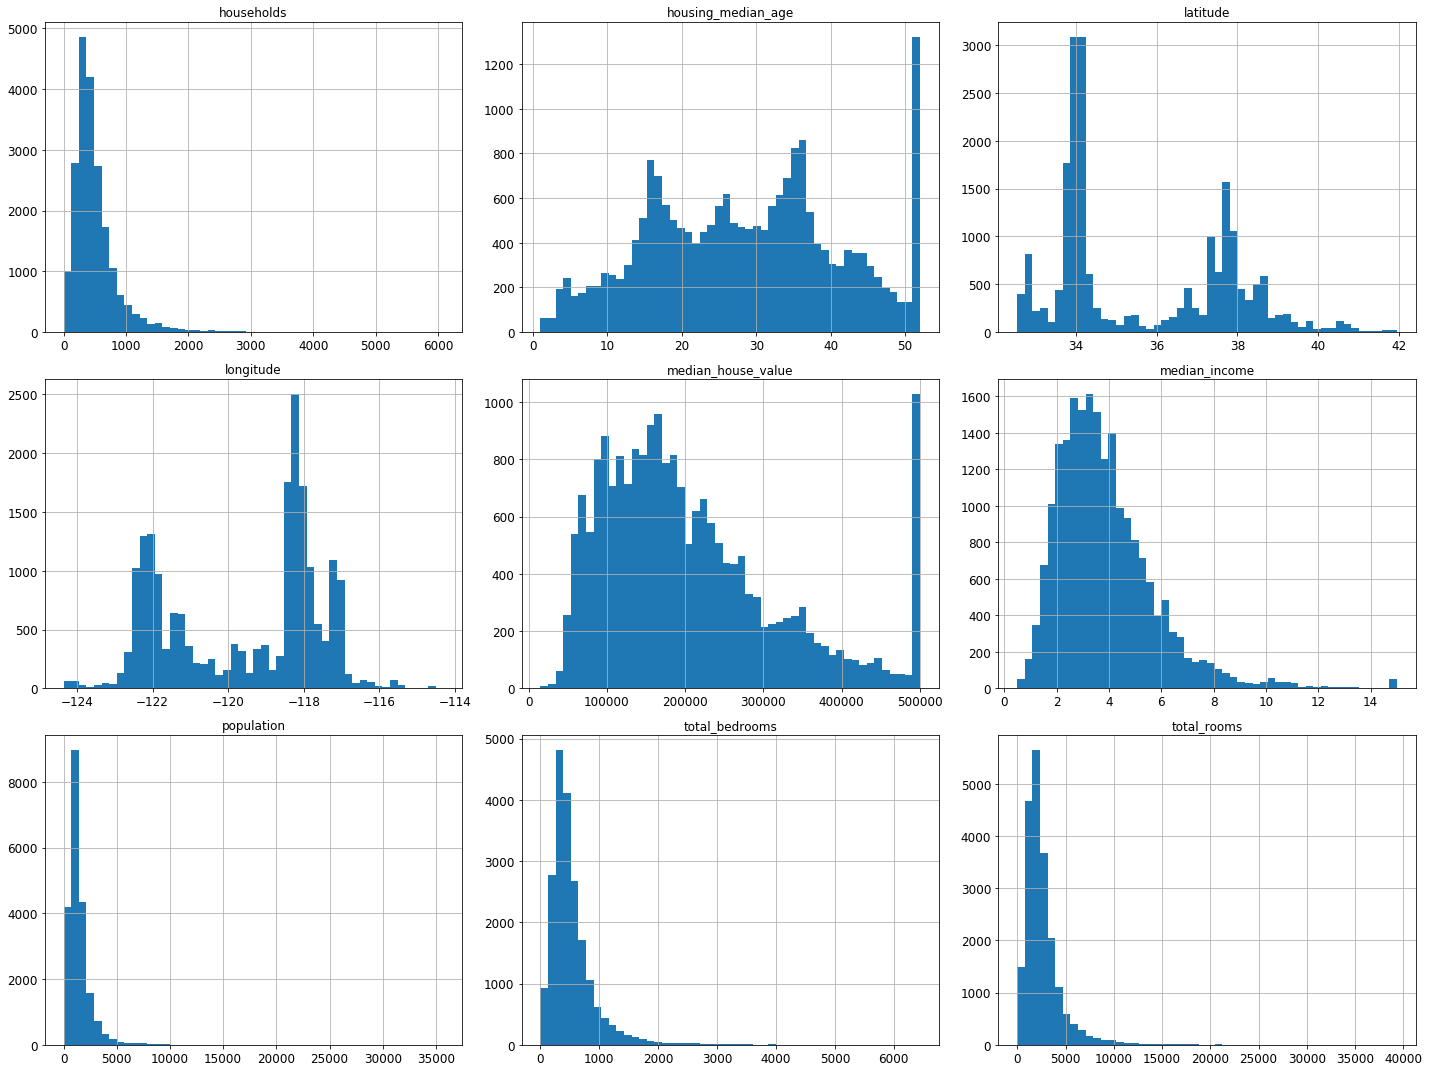

In [4]:
# Using this line of code to show the ploting in Jupyter notebook 
%matplotlib inline 

# Import the necessary libraries
import matplotlib.pyplot as plt

# Plot a histogram for each numerical attribute 
housing.hist(bins=50, figsize=(20,15))
save_fig('attribute_histogram_plots')
plt.show()

### Create the training and testing datasets

In [5]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

# Separate the dataset to training and testing sets 
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Print the instances of the training and testing datasets
print(len(train_set), "train +", len(test_set), "test")

# Create a copy of the training dataset
housing = train_set.copy()

16512 train + 4128 test


### Plot the Geographical Data

Saving figure geographical_data


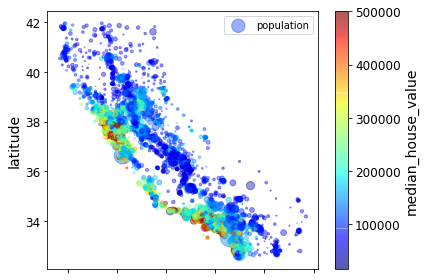

In [6]:
'''
The radius of each circle represents the district’s population (option s ), and the color represents 
the price (option c ). We will use a predefined color map (option cmap ) called jet,
which ranges from blue (low values) to red (high prices)
'''
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
save_fig('geographical_data')
plt.legend()

### Looking for Correlations

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa080041cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa089b85908>]], dtype=object)

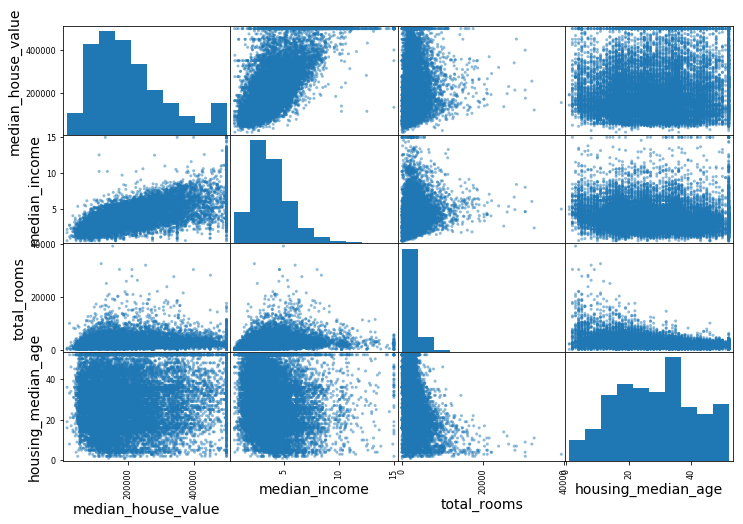

In [7]:
'''
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong 
positive correlation
'''

# compute the standard correlation coefficient between every pair of attributes using the corr() method
corr_matrix = housing.corr()
# look at how much each attribute correlates with the median house value
print(corr_matrix["median_house_value"].sort_values(ascending=False))

'''
Check for correlation between attributes using Pandas’ scatter_matrix function, which plots every numerical 
attribute against every other numerical attribute
'''
# Import the necessary libraries
from pandas.plotting import scatter_matrix

attributes = ["median_house_value",	"median_income", "total_rooms",
     "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

### Experimenting with Attribute Combinations

In [8]:
'''
One last thing you may want to do before actually preparing the data for Machine Learning algorithms is to 
try out various attribute combinations. For example, the total number of rooms in a district is not very useful
if you don’t know how many households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it 
to the number of rooms. And the population per household also seems like an interesting attribute combination
to look at
'''
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# compute the standard correlation coefficient between every pair of attributes using the corr() method
corr_matrix = housing.corr()
# look at how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

### Create the predictors and the labels

In [9]:
# Create the predictors by droping the target attribute 'median_house_value median_house_value'
housing = train_set.drop("median_house_value", axis=1)
# Create the lable by just take the attribute 'median_house_value median_house_value'
housing_labels = train_set["median_house_value"].copy()

print('Done..')

Done..


### Data Cleaning

In [10]:
'''
Get rid of the corresponding districts.
Get rid of the whole attribute.
Set the values to some value (zero, the mean, the median, etc.).

housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3
'''
# Import the necessary libraries
from sklearn.preprocessing import Imputer

# Handel the missing values suing the Scikit-Learn class 'Imputer'
imputer = Imputer(strategy="median")

'''
Since the median can only be computed on numerical attributes, we need to create a copy of the data
without the text attribute ocean_proximity
'''
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

'''
The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance
variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any 
missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical
attributes
'''
print('Statistics_ : ', imputer.statistics_)
print('housing_num median values: ', housing_num.median().values)

# Use this “trained” imputer to transform the training set by replacing missing values by the learned medians
X = imputer.transform(housing_num)
# Put it back into a Pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Statistics_ :  [ -118.51      34.26      29.      2129.       437.      1167.       410.
     3.5458]
housing_num median values:  [ -118.51      34.26      29.      2129.       437.      1167.       410.
     3.5458]


### Handling Text and Categorical Attributes

In [11]:
# Convert the categorical attribute to numbers

# Import the necessary libraries
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

'''
The mapping that this encoder has learned using the classes_ attribute (“<1H OCEAN” is mapped to 0, “INLAND” is
mapped to 1, etc.)
'''
print('The numerical representation of class: ', housing_cat_encoded)
print('The class labels: ', encoder.classes_)

'''
One issue with this representation is that ML algorithms will assume that two nearby values are more
similar than two distant values. Obviously this is not the case (for example, categories 0 and 4 are more
similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per
category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute 
equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
'''
'''
# Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
print('OneHotEncoder: ', housing_cat_1hot)
'''

'''
We can apply both transformations (from text categories to integer categories, then from integer categories
to one-hot vectors) in one shot using the LabelBinarizer class:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

Note that this returns a dense NumPy array by default. You can get a sparse matrix instead by passing 
sparse_output=True to the LabelBinarizer constructor.
'''

The numerical representation of class:  [4 4 4 ..., 0 0 3]
The class labels:  ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


'\nWe can apply both transformations (from text categories to integer categories, then from integer categories\nto one-hot vectors) in one shot using the LabelBinarizer class:\nfrom sklearn.preprocessing import LabelBinarizer\nencoder = LabelBinarizer()\nhousing_cat_1hot = encoder.fit_transform(housing_cat)\n\nNote that this returns a dense NumPy array by default. You can get a sparse matrix instead by passing \nsparse_output=True to the LabelBinarizer constructor.\n'

### Feature Scaling

In [12]:
'''
One of the most important transformations you need to apply to your data is feature scaling. With few
exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very 
different scales. This is the case for the housing data: the total number of rooms ranges from about 6
to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally 
not required.
Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so 
that they end up ranging from 0 to 1.
Standardization is quite different: first it subtracts the mean value (so standardized values always have a
zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike
min-max scaling, standardization does not bound values to a specific range, which may be a  problem for
some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income
equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, 
whereas standardization would not be much affected.
'''

'\nOne of the most important transformations you need to apply to your data is feature scaling. With few\nexceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very \ndifferent scales. This is the case for the housing data: the total number of rooms ranges from about 6\nto 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally \nnot required.\nMin-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so \nthat they end up ranging from 0 to 1.\nStandardization is quite different: first it subtracts the mean value (so standardized values always have a\nzero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike\nmin-max scaling, standardization does not bound values to a specific range, which may be a  problem for\nsome algorithms (e.g., neural networks often expect an input value ranging from 0 to 

### Custom Transformers

In [13]:
'''
Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such
as custom cleanup operations or combining specific attributes. You will want your transformer to work
seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck
typing (not inheritance), all you need is to create a class and implement three methods: fit() (returning
self ), transform() , and fit_transform() . You can get the last one for free by simply adding
TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args
and **kargs in your constructor) you will get two extra methods ( get_params() and set_params() )
that will be useful for automatic hyperparameter tuning.
'''
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
             return np.c_[X, rooms_per_household, population_per_household]

# There is nothing in Scikit-Learn to handle Pandas DataFrames, so we need to write a simple custom transformer
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

print('Done..')

Done..


### Transformation Pipelines

In [14]:
'''
There are many data transformation steps that need to be executed in the right order. Fortunately, 
Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small 
pipeline for the numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
            ('imputer', Imputer(strategy="median")),
            ('attribs_adder', CombinedAttributesAdder()),
            ('std_scaler', StandardScaler()),
        ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the
last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be
anything you like.
'''

'''
You now have a pipeline for numerical values, and you also need to apply the LabelBinarizer on the
categorical values: how can you join these transformations into a single pipeline? Scikit-Learn provides a
FeatureUnion class for this. You give it a list of transformers (which can be entire transformer
pipelines), and when its transform() method is called it runs each transformer’s transform() method
in parallel, waits for their output, and then concatenates them and returns the result (and of course calling
its fit() method calls all each transformer’s fit() method). A full pipeline handling both numerical and
categorical attributes may look like this:
'''
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
                ('selector', DataFrameSelector(num_attribs)),
                ('imputer', Imputer(strategy="median")),
                ('attribs_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler()),
            ])
cat_pipeline = Pipeline([
                ('selector', DataFrameSelector(cat_attribs)),
                ('label_binarizer', LabelBinarizer()),
            ])
full_pipeline = FeatureUnion(transformer_list=[
                ("num_pipeline", num_pipeline),
                ("cat_pipeline", cat_pipeline),
            ])
housing_prepared = full_pipeline.fit_transform(housing)
print('housing_prepared: ', housing_prepared)
print('housing_prepared shap: ', housing_prepared.shape)

housing_prepared:  [[ 1.27258656 -1.3728112   0.34849025 ...,  0.          0.          1.        ]
 [ 0.70916212 -0.87669601  1.61811813 ...,  0.          0.          1.        ]
 [-0.44760309 -0.46014647 -1.95271028 ...,  0.          0.          1.        ]
 ..., 
 [ 0.59946887 -0.75500738  0.58654547 ...,  0.          0.          0.        ]
 [-1.18553953  0.90651045 -1.07984112 ...,  0.          0.          0.        ]
 [-1.41489815  0.99543676  1.85617335 ...,  0.          1.          0.        ]]
housing_prepared shap:  (16512, 16)


# Training and Evaluating on the Training Set

### Linear Regression model

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Try it out on a few instances from the training set

In [16]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 181746.54359616  290558.74973505  244957.50017771  146498.51061398
  163230.42393939]
Labels:		 [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


### Measure this regression model’s RMSE on the whole training set

In [17]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.207457752535

### Decision Tree Regressor model

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

### Measure this regression model’s RMSE on the whole training set

In [19]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,	housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Evaluation Using Cross-Validation

In [20]:
'''
One way to evaluate the Decision Tree model would be to use the train_test_split function to split
the training set into a smaller training set and a validation set, then train your models against the smaller
training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult and it
would work fairly well.
A great alternative is to use Scikit-Learn’s cross-validation feature. The following code performs K-fold
cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and
evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time	and
training on the other 9 folds. The result is an array containing the 10 evaluation scores
'''
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
'''
Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), 
so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why 
the preceding code computes -scores before calculating the square root.
'''
# Calculate the results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

# Compute the scores for the Linear Regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66217.79464861  70527.8624234   69468.14254919  69329.58382433
  73406.2144407   68489.87791661  67983.30161621  68746.08149426
  65506.66053524  69714.33531692]
Mean: 68938.9854765
Standard deviation: 2094.09602059
Scores: [ 65000.67382615  70960.56056304  67122.63935124  66089.63153865
  68410.97156101  65266.34735288  65218.78174481  68525.46981754
  72739.87555996  68957.34111906]
Mean: 67829.2292434
Standard deviation: 2468.2886677


### Random Forest Regressor model

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Measure this Random Forest Regressor model’s RMSE on the whole training set

In [22]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_mse = np.sqrt(forest_mse)
tree_rmse

0.0

### Evaluation Using Cross-Validation

In [23]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 49709.97793802  54487.26029633  52059.43866229  54063.94817509
  54914.39113252  50413.26391512  48846.43422361  52226.28211905
  52802.59472854  52300.69971454]
Mean: 52182.4290905
Standard deviation: 1926.22538961


# Saving the models

In [24]:
'''
You should save every model you experiment with, so you can come back easily to any model you want. Make sure 
you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and
perhaps the actual predictions as well. This will allow you to easily compare scores across model types, 
and compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s pickle
module, or using sklearn.externals.joblib , which is more efficient at serializing large NumPy arrays:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")
'''

'\nYou should save every model you experiment with, so you can come back easily to any model you want. Make sure \nyou save both the hyperparameters and the trained parameters, as well as the cross-validation scores and\nperhaps the actual predictions as well. This will allow you to easily compare scores across model types, \nand compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s pickle\nmodule, or using sklearn.externals.joblib , which is more efficient at serializing large NumPy arrays:\nfrom sklearn.externals import joblib\njoblib.dump(my_model, "my_model.pkl")\n# and later...\nmy_model_loaded = joblib.load("my_model.pkl")\n'

# Grid Search

In [25]:
'''
One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination
of hyperparameter values. This would be very tedious work, and you may not have time to explore many 
combinations. Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do 
is tell it which hyperparameters you want it to experiment with, and what values to try out, and 
it will evaluate all the possible combinations of hyperparameter values, using cross-validation. For example, 
the following code searches for the best combination of hyperparameter values for the RandomForestRegressor
Note: If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best 
estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea 
since feeding it more data will likely improve its performance.

In this example, we obtain the best solution by setting the max_features hyperparameter to 6 , and the
n_estimators hyperparameter to 30. The RMSE score for this combination is 49,959, which is slightly
better than the score you got earlier using the default hyperparameter values (which was 52,634).
'''
from sklearn.model_selection import	GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3,	10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

# The best combination of parameters
print('The best combination of parameters: ', grid_search.best_params_)

# The best estimator directly
print('The best estimator directly: ', grid_search.best_estimator_)

# The evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

The best combination of parameters:  {'max_features': 6, 'n_estimators': 30}
The best estimator directly:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
63704.977098 {'max_features': 2, 'n_estimators': 3}
54679.4362021 {'max_features': 2, 'n_estimators': 10}
52835.9838729 {'max_features': 2, 'n_estimators': 30}
59786.3692821 {'max_features': 4, 'n_estimators': 3}
51986.7296335 {'max_features': 4, 'n_estimators': 10}
50181.8677284 {'max_features': 4, 'n_estimators': 30}
58768.8918482 {'max_features': 6, 'n_estimators': 3}
52244.7016432 {'max_features': 6, 'n_estimators': 10}
49599.2752653 {'max_features': 6, 'n_estimators': 30}
58905.5540666 {'max_features': 8, 'n_estimators': 3}
51938.7777046 {'m

# Randomized Search

In [26]:
'''
The grid search approach is fine when you are exploring relatively few combinations, like in the previous
example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV 
instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying 
out all possible combinations, it evaluates a given number of random combinations by selecting a random value 
for each hyperparameter at every iteration. This approach has two main benefits:
- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000
different values for each hyperparameter (instead of just a few values per hyperparameter with the
grid search	approach).
- You have more control over the computing budget you want to allocate to hyperparameter search, simply by
setting the number of iterations.
'''

'\nThe grid search approach is fine when you are exploring relatively few combinations, like in the previous\nexample, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV \ninstead. This class can be used in much the same way as the GridSearchCV class, but instead of trying \nout all possible combinations, it evaluates a given number of random combinations by selecting a random value \nfor each hyperparameter at every iteration. This approach has two main benefits:\n- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000\ndifferent values for each hyperparameter (instead of just a few values per hyperparameter with the\ngrid search\tapproach).\n- You have more control over the computing budget you want to allocate to hyperparameter search, simply by\nsetting the number of iterations.\n'

# Analyze the Best Models and Their Errors

In [27]:
# RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions
feature_importances = grid_search.best_estimator_.feature_importances_
print('feature importances: ', feature_importances)
# display these importance scores next to their corresponding attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

feature importances:  [  8.30317897e-02   7.17058770e-02   3.93639879e-02   1.78716834e-02
   1.71407126e-02   1.75263186e-02   1.57127588e-02   3.11092948e-01
   6.33193648e-02   1.02496673e-01   7.48438242e-02   1.94132091e-02
   1.56881581e-01   1.89236834e-04   4.38710664e-03   5.02292882e-03]


[(0.31109294788462544, 'median_income'),
 (0.15688158061962956, 'INLAND'),
 (0.10249667313290912, 'pop_per_hhold'),
 (0.083031789736659714, 'longitude'),
 (0.074843824208823906, 'bedrooms_per_room'),
 (0.071705877019769645, 'latitude'),
 (0.063319364820750873, 'rooms_per_hhold'),
 (0.039363987883730869, 'housing_median_age'),
 (0.019413209097986814, '<1H OCEAN'),
 (0.017871683402896139, 'total_rooms'),
 (0.017526318595480237, 'population'),
 (0.017140712556034735, 'total_bedrooms'),
 (0.015712758750256163, 'households'),
 (0.005022928820390276, 'NEAR OCEAN'),
 (0.0043871066362403373, 'NEAR BAY'),
 (0.00018923683381607485, 'ISLAND')]

# Evaluate the model on the Test Set

In [32]:
final_model	= grid_search.best_estimator_
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
print('Final_rmse: ', final_rmse)

Final_rmse:  48674.550565
